<a href="https://colab.research.google.com/github/AkulaTejdeep/2203A52133_DAUP-PROJECT/blob/main/1DAUP_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skewness before transformation:
 Year            -0.171851
Teams            0.322539
Attendance      -0.051976
AttendanceAvg   -0.294979
Matches         -0.142693
dtype: float64

Skewness after transformation:
 Year            -0.190974
Teams            0.184794
Attendance      -0.751878
AttendanceAvg   -0.864754
Matches         -0.541151
dtype: float64


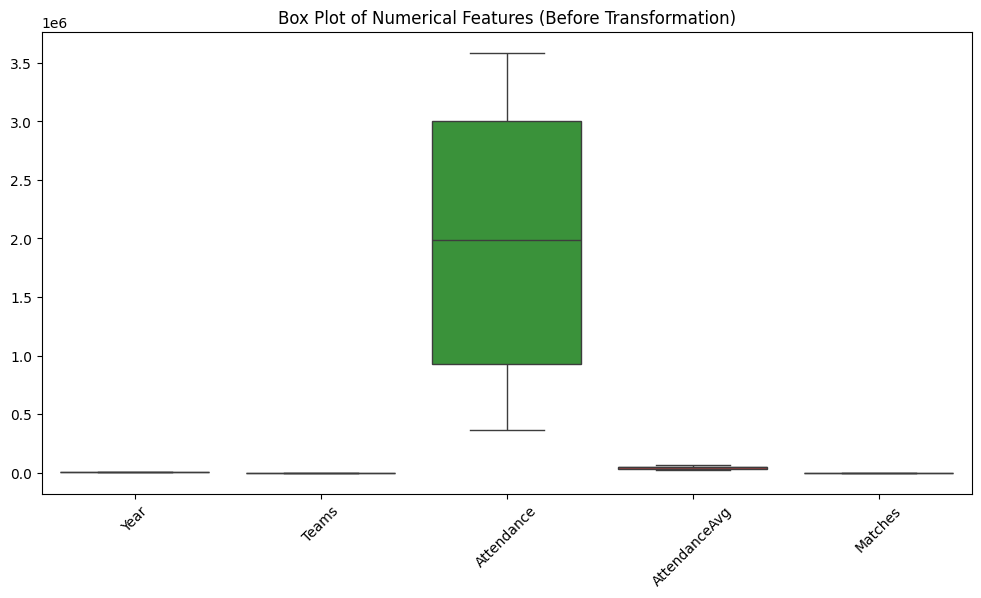

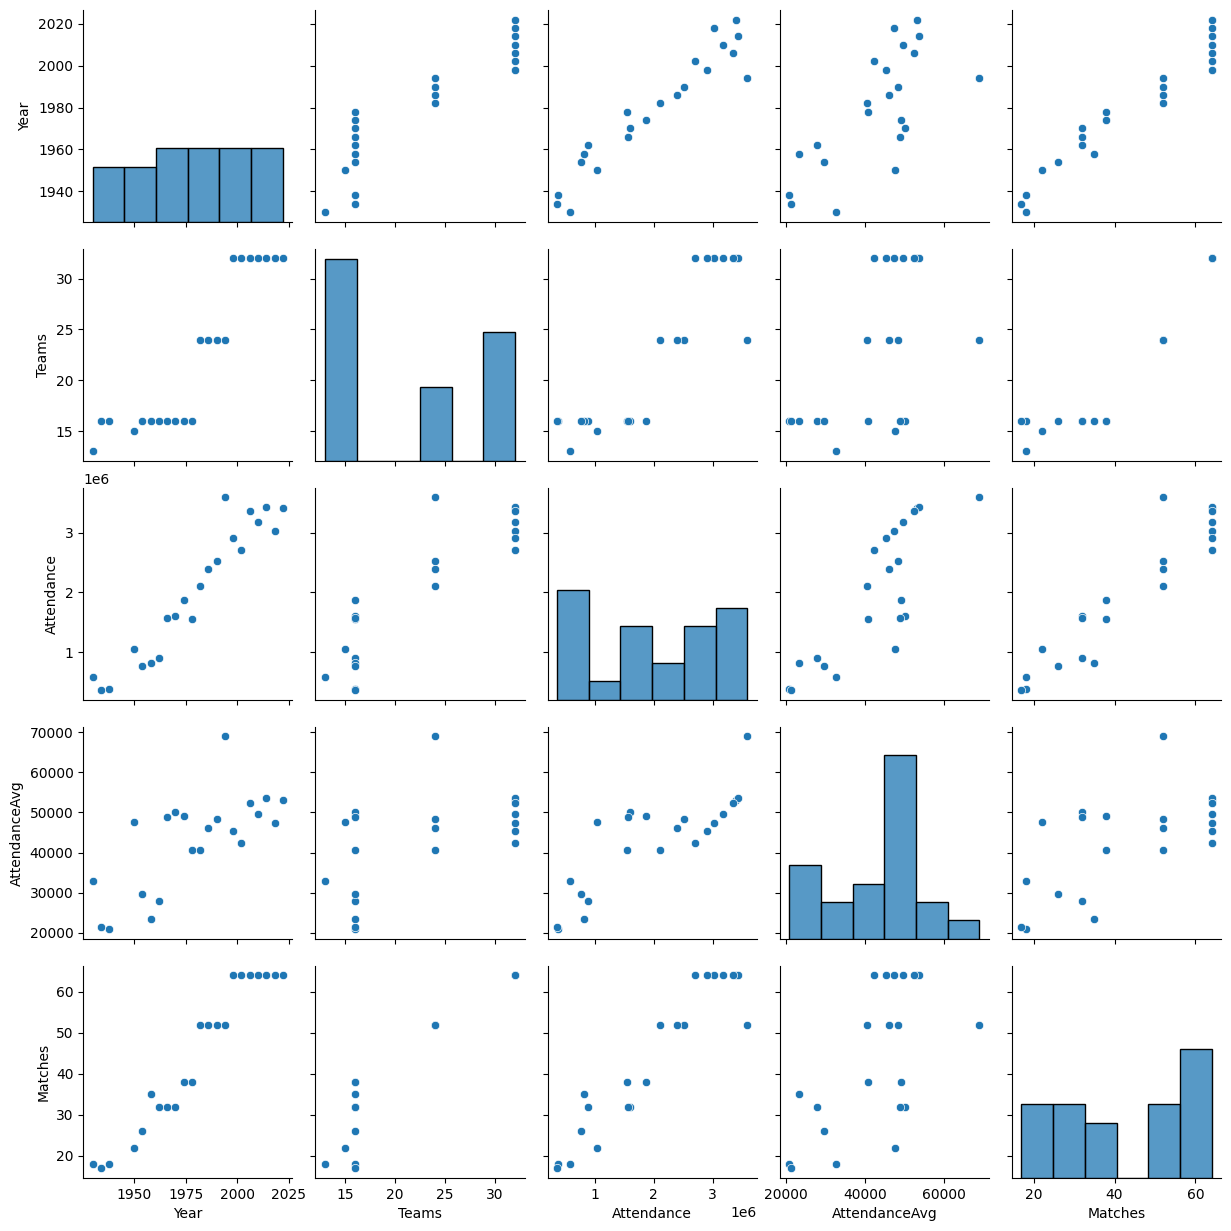


Outliers detected:
Year             0
Teams            0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64

Linear Regression Performance:
MAE: 0.0007383028606437137
MSE: 6.748664961551653e-07
R2 Score: 0.9999971942578311

Decision Tree Performance:
MAE: 0.25904245803118686
MSE: 0.16364454833850475
R2 Score: 0.31965149759351696

Random Forest Performance:
MAE: 0.09090128146466903
MSE: 0.018440681546609626
R2 Score: 0.9233332842372562


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "/content/world_cup.csv"
df = pd.read_csv(file_path)

numerical_cols = ["Year", "Teams", "Attendance", "AttendanceAvg", "Matches"]

print("Skewness before transformation:\n", df[numerical_cols].apply(skew))

df_transformed = df.copy()
df_transformed[numerical_cols] = np.log1p(df[numerical_cols])

print("\nSkewness after transformation:\n", df_transformed[numerical_cols].apply(skew))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Numerical Features (Before Transformation)")
plt.xticks(rotation=45)
plt.show()

sns.pairplot(df[numerical_cols])
plt.show()

# Detecting outliers using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected:")
print(outliers.sum())

X = df_transformed[["Year", "Teams", "AttendanceAvg", "Matches"]]
y = df_transformed["Attendance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
